<a href="https://colab.research.google.com/github/jae-yong-2/ML_STUDY/blob/main/DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import os

In [2]:
from sklearn.datasets import load_breast_cancer
breast=load_breast_cancer()

In [3]:
x_train, x_test , y_train, y_test = train_test_split(breast.data, breast.target, test_size=0.3,random_state=2021)

In [4]:
score=pd.DataFrame(index=['train','test'])
pre=pd.DataFrame(index=['train','test'])

아무런 세팅없이 기본으로 하기

In [5]:
DT=tree.DecisionTreeClassifier()
DT=DT.fit(x_train,y_train)

In [6]:
np.mean(DT.predict(x_train)==np.array(y_train))

1.0

In [7]:
np.mean(DT.predict(x_test)==np.array(y_test))

0.9590643274853801

feature_importances_를 이용해서 해보기

[Text(203.7913043478261, 203.85, 'X[27] <= 0.142\ngini = 0.467\nsamples = 398\nvalue = [148, 250]'),
 Text(131.0086956521739, 176.67000000000002, 'X[20] <= 17.72\ngini = 0.135\nsamples = 262\nvalue = [19, 243]'),
 Text(72.78260869565217, 149.49, 'X[27] <= 0.111\ngini = 0.062\nsamples = 249\nvalue = [8, 241]'),
 Text(29.11304347826087, 122.31, 'X[18] <= 0.009\ngini = 0.018\nsamples = 221\nvalue = [2, 219]'),
 Text(14.556521739130435, 95.13, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(43.66956521739131, 95.13, 'X[21] <= 33.35\ngini = 0.009\nsamples = 220\nvalue = [1, 219]'),
 Text(29.11304347826087, 67.94999999999999, 'gini = 0.0\nsamples = 205\nvalue = [0, 205]'),
 Text(58.22608695652174, 67.94999999999999, 'X[21] <= 33.56\ngini = 0.124\nsamples = 15\nvalue = [1, 14]'),
 Text(43.66956521739131, 40.77000000000001, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(72.78260869565217, 40.77000000000001, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(116.45217391304348, 122.31, 'X

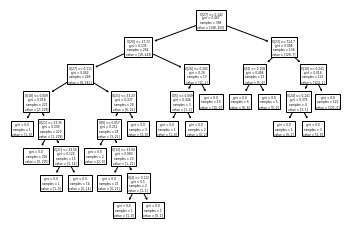

In [180]:
tree.plot_tree(DT)

In [85]:
importance=DT.feature_importances_.argsort()[::-1]

In [86]:
importance

array([27, 20,  4, 21, 23,  9, 26, 18, 24,  5, 13, 10,  2,  1,  3,  6,  7,
        8, 29, 14, 11, 12, 28, 15, 16, 17, 19, 22, 25,  0])

In [155]:
X_train = pd.DataFrame(x_train).iloc[:,[importance[0],importance[1],importance[2]]]
X_test = pd.DataFrame(x_test).iloc[:,[importance[0],importance[1],importance[2]]]

In [156]:
DT_3D=tree.DecisionTreeClassifier()

In [157]:
DT_3D.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [158]:
np.mean(DT_3D.predict(X_test)==y_test)

0.9239766081871345

[Text(220.26315789473685, 207.55636363636364, 'X[0] <= 0.142\ngini = 0.467\nsamples = 398\nvalue = [148, 250]'),
 Text(158.58947368421053, 187.7890909090909, 'X[1] <= 17.72\ngini = 0.135\nsamples = 262\nvalue = [19, 243]'),
 Text(88.10526315789474, 168.0218181818182, 'X[0] <= 0.111\ngini = 0.062\nsamples = 249\nvalue = [8, 241]'),
 Text(35.242105263157896, 148.25454545454545, 'X[1] <= 14.485\ngini = 0.018\nsamples = 221\nvalue = [2, 219]'),
 Text(17.621052631578948, 128.48727272727274, 'gini = 0.0\nsamples = 172\nvalue = [0, 172]'),
 Text(52.863157894736844, 128.48727272727274, 'X[1] <= 14.495\ngini = 0.078\nsamples = 49\nvalue = [2, 47]'),
 Text(35.242105263157896, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(70.48421052631579, 108.72, 'X[0] <= 0.031\ngini = 0.041\nsamples = 48\nvalue = [1, 47]'),
 Text(52.863157894736844, 88.95272727272729, 'X[0] <= 0.026\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(35.242105263157896, 69.18545454545455, 'gini = 0.0\nsamples = 1\nva

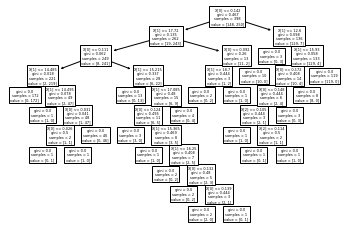

In [179]:
tree.plot_tree(DT_3D)

In [159]:
target_0_X=X_train.iloc[y_train==0,:]
target_1_X=X_train.iloc[y_train==1,:]

In [161]:
target_0_X.iloc[:,]

,27,20,4
1,0.22160,25.45,0.11100
5,0.21340,23.17,0.11200
7,0.14240,12.84,0.12270
10,0.09975,19.19,0.08206
12,0.26880,33.12,0.10940
...,...,...,...
384,0.17890,24.86,0.09009
386,0.17080,23.36,0.08523
391,0.16130,23.23,0.09156
393,0.16070,16.23,0.09714


In [176]:
import plotly.graph_objects as go
fig = go.Figure(data=[
                      
                go.Scatter3d(
                x=target_0_X.iloc[:,0],
                y=target_0_X.iloc[:,1],
                z=target_0_X.iloc[:,2],
                mode='markers',
                marker=dict(size=1,color='blue')),

                go.Scatter3d(
                x=target_1_X.iloc[:,0],
                y=target_1_X.iloc[:,1],
                z=target_1_X.iloc[:,2],
                mode='markers',
                marker=dict(size=1,color='red')),
])
fig.show()